This is the base code that transforms one random polygon with n vertices in an another random polygon with the same number of vertices.
\
There are 3 main functions:
\
function generate_subspaces(n) => generate the random subspaces that represent the triangles\
function cs_decomposition(n,E,F,E1,E2,F1,F2) => makes a cs decomposition on the two subspaces generated\
function draw(M, n) => converts the input matrix (the base) into points on the graph that represent the triangle



In [1]:
using LinearAlgebra
using Plots

In [2]:
function generate_subspaces(n)
    E,=qr(randn(n,n))
    E1=E[:,1:2]
    E2=E[:,3:end]
    F,=qr(randn(n,n))
    F1=F[:,1:2]
    F2=F[:,3:end]
    return E,F,E1,E2,F1,F2
end

generate_subspaces (generic function with 1 method)

In [3]:
function cs_decomposition(n,E,F,E1,E2,F1,F2)
    U1,S11,V1=svd(E1'*F1,full=true)
    temp,S12,V2=svd(E1'*F2,full=true)
    U2,S22,V2=svd(E2'*F2,full=true)
    D=[U1'*E1'*F1*V1 U1'*E1'*F2*V2
    U2'*E2'*F1*V1 U2'*E2'*F2*V2]
    U=[U1 zeros(2,n-2)
    zeros(n-2,2) U2]
    W=E*U*D*U'*E'
    return W, U, U1, U2, V1, V2, D
end

cs_decomposition (generic function with 1 method)

In [4]:
function draw(M, n)
    x = M[:, 1]
    y = M[:, 2]
    z = x + im * y
    e = z .^ 2
    E = [real(e)' ; imag(e)']
    
    points = zeros(2, n + 1)
    for i in 1:n
        points[:, i + 1] = sum(E[:, 1:i], dims=2)
    end
    
    return points
end

draw (generic function with 1 method)

In [5]:
n=3
E,F,E1,E2,F1,F2=generate_subspaces(n)

(LinearAlgebra.QRCompactWYQ{Float64, Matrix{Float64}, Matrix{Float64}}([-2.1652245415201885 0.04354076203434354 -0.03352495109444655; 0.10647105812812864 0.5599002473066587 1.5080532370245168; 0.45521398020434334 -0.4582929081878207 -0.993062210036729], [1.6412870968920459 0.27711314027106476 0.0; 1.04178773938e-311 1.6528483179724678 0.0; 1.0417677700606e-311 1.041767770179e-311 0.0]), LinearAlgebra.QRCompactWYQ{Float64, Matrix{Float64}, Matrix{Float64}}([2.193909891957702 0.12268272314077222 -1.2576151027215403; 0.2980300876714034 1.441261263927276 0.3648352013791345; -0.18592670257473953 -0.6380317302536478 3.0924143572401275], [1.7803245567627957 -1.0543575634556968 0.0; 1.47057717203106e-310 1.4213787557922566 0.0; 4.2077432864967404e-284 7.291122024347466e-304 0.0]), [-0.6412870968920459 -0.4518627141692053; -0.17474957389814053 -0.7009586192787112; -0.74713683203426 0.5517944378140486], [-0.6201378450823742; 0.6914619298857321; 0.37055290123717577;;], [-0.7803245567627957 0.5237

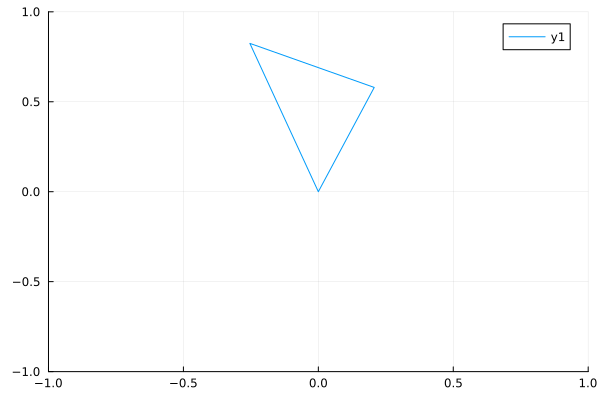

In [6]:
points=draw(E1,n)
plot(points[1,:],points[2,:],xlim=[-1,1], ylim=[-1,1])

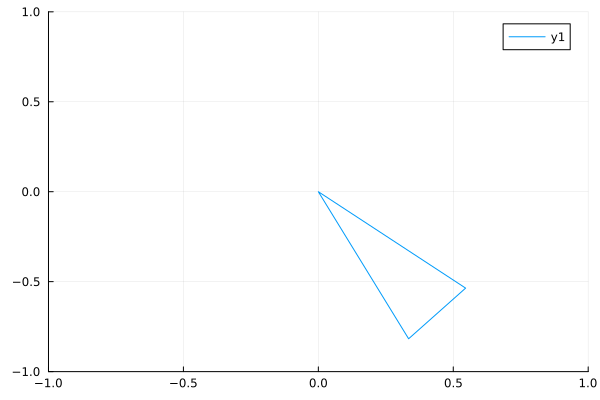

In [7]:
points=draw(F1,n)
plot(points[1,:],points[2,:],xlim=[-1,1], ylim=[-1,1])

3×3 Matrix{Float64}:
 1.0          0.0       -1.60268e-16
 5.55112e-17  0.948248  -0.317532
 2.73013e-16  0.317532   0.948248

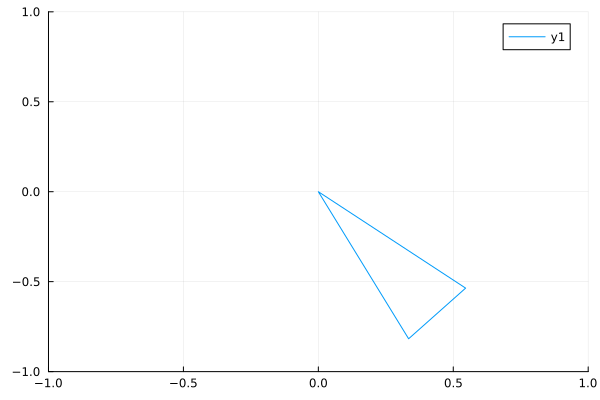

In [20]:
W, U, U1, U2, V1, V2, D=cs_decomposition(n,E,F,E1,E2,F1,F2)
display(D)
points=draw(W*E1*U1*V1', n)
plot(points[1,:],points[2,:],xlim=[-1,1], ylim=[-1,1])